In [1]:
import pandas as pd

# Load rounds2.csv

In [2]:
# rounds2 = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")

Tried encoding with "ISO-8859-1" but it makes dataframe corrupt by such characters: ç§ÿè½¦

Using Palmos encoding rectified this as the characters read are rightly changed to their correct uppercase strings.

In [3]:
rounds2 = pd.read_csv('rounds2.csv', encoding = "Palmos")

In [4]:
rounds2.shape

(114949, 6)

In [5]:
rounds2.head(100)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
95,/ORGANIZATION/1234ENTER,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,150267.0
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,NaN,01-09-2012,500000.0
97,/ORGANIZATION/123CONTACTFORM,/funding-round/af7382f8e3d806986796029388cb1b7f,venture,NaN,16-06-2015,1000000.0
98,/organization/123contactform,/funding-round/b678dec4e0df10e2518a81215f8fd843,angel,NaN,01-01-2010,NaN


# How many unique companies are present in rounds2?

In [6]:
# Data quality check to ensure that there are no NaNs for company unique_id in rounds2.csv
rounds2.company_permalink.isnull().sum()

0

In [7]:
# Count of unique companies present in rounds2 dataframe
rounds2.company_permalink.nunique()
# IMPORTANT: But we can't rely on this data because we don't know about the data quality,
# so we will again check later

90247

# Load companies.txt

In [8]:
# companies = pd.read_csv("companies.txt", sep='\t', encoding="ISO-8859-1")

In [9]:
# companies = pd.read_csv('companies.txt', sep = '\t', engine='python')

Tried encoding with "ISO-8859-1" but it makes dataframe corrupt by such characters: ç§ÿè½¦

In [10]:
companies = pd.read_csv("companies.txt", sep='\t', encoding='Palmos')

In [11]:
companies.shape

(66368, 10)

In [12]:
companies.head(100)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
95,/Organization/1Commmedical,1CommMedical,http://1commmedical.com,Health Care|Insurance|Medical,operating,USA,IA,Des Moines,Ankeny,01-01-2013
96,/Organization/1D4-Pty,1d4 Pty,http://www.immortaloutdoors.com,Geospatial|Maps|Outdoors,operating,NOR,2,NaN,NaN,NaN
97,/Organization/1Day1Song,1Day1Song,http://1day1song.com/,Music Services,operating,KOR,11,Seoul,Seoul,01-12-2012
98,/Organization/1Daylater,1DayLater,http://1daylater.com,Curated Web|Tracking,closed,AUS,2,Sydney,Newcastle,26-08-2009


# How many unique companies are present in the companies file?

In [13]:
# Data quality check to ensure that there are no NaNs for company unique_id in companies.csv
companies.permalink.isnull().sum()

0

In [14]:
# Count of unique company ids present in companies dataframe
companies.permalink.nunique()
# But we can't rely on this data because we don't know about the data quality, so we will again check later

66368

# Data Preparation

At this initial stage, we could have only lowercased unique_id columns for both frames, But instead since it's useful at later stages, doing lower case here itself for both these initial dataframes.

In [15]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [16]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Appefize,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [17]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [18]:
# lower case permalink of dataframe companies
companies['permalink'] = companies['permalink'].apply(lambda x: x.lower())

In [19]:
# lower case dataframe rounds2 for company_permalink
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower())

In [20]:
# shape of companies before dropping duplicates, if any
companies.shape

(66368, 10)

In [21]:
# Drop any duplicates from companiesm, if any
companies = companies.drop_duplicates()

In [22]:
# shape of companies after dropping duplicates, if any
companies.shape

(66368, 10)

In [23]:
# shape of rounds2 before dropping duplicates, if any
rounds2.shape

(114949, 6)

In [24]:
# Drop any duplicates from rounds2
rounds2 = rounds2.drop_duplicates()

In [25]:
# shape of rounds2 after dropping duplicates, if any
rounds2.shape

(114949, 6)

In [26]:
# Check head for prepared dataframe companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [27]:
# Check head for prepared dataframe rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# How many unique companies are present in rounds2?

In [28]:
# Data quality check to ensure that there are no NaNs for company unique_id in rounds2.csv
rounds2.company_permalink.isnull().sum()

0

In [29]:
# Count of unique companies present in rounds2 dataframe
rounds2.company_permalink.nunique()

66368

# How many unique companies are present in the companies file?

In [30]:
# Data quality check to ensure that there are no NaNs for company unique_id in companies.csv
companies.permalink.isnull().sum()

0

In [31]:
# Count of unique company ids present in companies dataframe
companies.permalink.nunique()

66368

# Are there any companies in rounds2 file which are not  present in companies ?

Using isin to check each company_permalink from rounds2 into permalink of companies, if exists or not.
If there is any company_permalink not present, should give a count with nunique()

In [32]:
rounds2[~rounds2['company_permalink'].isin(companies.permalink)].company_permalink.nunique()

0

# Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.

In [33]:
# Earlier with this approach, I was getting duplicated columns, so next cell to avoid that
# master_frame = rounds2.merge(companies, left_on='company_permalink', right_on='permalink')

In [34]:
# Merge without duplicating column
master_frame = rounds2.merge(companies.set_index('permalink'), left_on='company_permalink', right_index=True)

# How many observations are present in master_frame ?

In [35]:
# No. of rows in shape of master_frame denotes count of observations
master_frame.shape

(114949, 15)

# Exploring master_frame

In [36]:
# Compare with rounds2, so we got all rows and 6 columns from it
rounds2.shape

(114949, 6)

In [37]:
# Compare with companies, so we merged all rows and 9 columns from it (skipped permalink to avoid duplicate column)
companies.shape

(66368, 10)

In [38]:
# head of master_frame
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [39]:
# List of all funding_round_types in master_frame
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [40]:
# value counts of all funding_round_types in master_frame
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

# Cleaning and manipulating data

In [41]:
# Convert raised_amount_usd to float types for numeric statistics calculations
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].astype(float)

In [42]:
master_frame_initial = master_frame.copy()

In [43]:
master_frame.shape

(114949, 15)

In [44]:
# Find whether NaNs exist in raised_amount_usd
master_frame['raised_amount_usd'].isnull().sum()

19990

(19990/114949) * 100 : So 17% of the total rows have raised_amount_usd as NaNs, directly dropping such a huge percentage of data is not a good option according to me

In [45]:
# Observe the rows where raised_amount_usd isnull
master_frame[(master_frame['raised_amount_usd'].isnull())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114899,/organization/zymr-inc-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN,"Zymr, Inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN
114905,/organization/zynergy-projects-services,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN
114913,/organization/zynga,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007
114927,/organization/zypsee,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011


In [46]:
# Analyze all the rows where raised_amount_usd is NaN by moving it into a new df
missing_df = master_frame[(master_frame['raised_amount_usd'].isnull())]

In [47]:
missing_df.funding_round_code.value_counts()

A    1940
B     615
C     256
D     108
E      30
F      20
G       2
Name: funding_round_code, dtype: int64

(17019 / 114949) * 100 : So 14% rows have both funding_round_code and raised_amount_usd missing

In [48]:
# This shows that which all columns have how many NaNs, along with raised_amount_usd
for col in missing_df.columns:
    print(col, missing_df[col].isnull().sum())

company_permalink 0
funding_round_permalink 0
funding_round_type 0
funding_round_code 17019
funded_at 0
raised_amount_usd 19990
name 0
homepage_url 1802
category_list 2366
status 0
country_code 2827
state_code 3342
region 3119
city 3119
founded_at 4555


In [49]:
missing_df.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
19,/organization/1-800-dentist,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,NaN,19-08-2010,NaN,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008
40,/organization/1000museums-com,/funding-round/6dcccfea326e6add866bf67aafb0a7df,convertible_note,NaN,01-12-2014,NaN,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008
42,/organization/1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,NaN,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008
51,/organization/1006-tv,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,NaN,01-01-2011,NaN,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009


In [50]:
missing_df.tail(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
114827,/organization/zuse,/funding-round/88fb7c19c4ab029020ecd39c0aae2374,angel,NaN,01-05-2013,NaN,Zuse,NaN,Software,operating,USA,NY,New York City,New York,NaN
114833,/organization/zuuka,/funding-round/6e0fc86125b5393102d605794b2389d9,undisclosed,NaN,24-01-2011,NaN,zuuka!,http://www.istorytime.com,Apps|Entertainment|Kids|Mobile|Publishing,acquired,USA,CA,Santa Barbara,Santa Barbara,10-04-2009
114834,/organization/zuuka,/funding-round/822fffffca8349b7c7df7a262179dcef,undisclosed,NaN,11-06-2012,NaN,zuuka!,http://www.istorytime.com,Apps|Entertainment|Kids|Mobile|Publishing,acquired,USA,CA,Santa Barbara,Santa Barbara,10-04-2009
114847,/organization/zvooq,/funding-round/e2acbf36798538e3f6aace754ca80345,venture,NaN,01-06-2011,NaN,Zvooq,http://zvooq.com,Music,operating,RUS,48,Moscow,Moscow,01-01-2011
114857,/organization/zyante,/funding-round/fc7ee77c04a85a5185c25b6bf12e94a0,undisclosed,NaN,01-12-2013,NaN,Zyante,http://www.zyante.com,News,operating,USA,CA,SF Bay Area,Los Gatos,01-01-2012
114859,/organization/zyb,/funding-round/2490f7790f2b60137422cc89c2356747,angel,NaN,01-01-2005,NaN,ZYB,http://zyb.com,Mobile|Networking|Social Network Media,acquired,DNK,17,Copenhagen,Copenhagen,NaN
114860,/organization/zyfin,/funding-round/98cef3afd5e88487a9829ff182fb1a25,venture,A,01-11-2011,NaN,Zyfin,http://www.zyfin.com/,Finance,operating,NaN,NaN,NaN,NaN,NaN
114869,/organization/zygo,/funding-round/2506b93dd05e01d0fe27d098879b375e,angel,NaN,19-11-2007,NaN,Zygo Communications,http://www.zygocommunications.com/who,Mobile|SMS,closed,GBR,H9,London,London,21-06-2005
114878,/organization/zyme-solutions,/funding-round/33d24808a624466e3498b0efc4942d23,private_equity,NaN,20-05-2013,NaN,Zyme Solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01-01-2004
114884,/organization/zymergen,/funding-round/6b08eaf89f9a6211f1c83494c2bf8e82,seed,NaN,01-01-2014,NaN,Zymergen,http://www.zymergen.com,Biotechnology,operating,USA,CA,SF Bay Area,Emeryville,01-01-2013


Till now we deduce the following imputation and removal strategy to handle missing values:
1. Rows where category_list and country_code is NaN should be removed, as it's not useful in analysis further and is also not possible to impute it.
2. Rows where raised_amount_usd and funding_round_code both are NaNs, this seems to be suspicious / entries without much disclosure. So better we remove such rows to cleanup the data. This decision is based on because Spark funds is looking for investment per round, and if funding_round code is missing, it can be incorrect/random data. Also there would be no way to impute. Although, the percentage of rows with NaN funding_round_code is too high.
3. For rest of the rows where raised_amount_usd, we can impute it with a mean/median value for a particular fund_type, country etc.
    - Mean, if no outliers exists
    - Median, if outliers exists
4. We can remove those investment details where raised_amount_usd is NaN and status is closed.
5. Sometimes, there are missing values when some high profile investors doesn't want to share these few information details.

This strategy is right now, we will revisit after some cleanup actions right now

In [51]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [52]:
# PROBLEM with float format, tried to solve with a way in next cell
# Although raised_amount_usd column is float type
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [53]:
# With float formatting appended
master_frame['raised_amount_usd'].describe().apply(lambda x: format(x, '.2f'))

count          94959.00
mean        10426869.33
std        114821247.98
min                0.00
25%           322500.00
50%          1680511.00
75%          7000000.00
max      21271935000.00
Name: raised_amount_usd, dtype: object

Observe outliers in raised_amount_usd as the maximum is way high compared to mean and median. So seems that the most representative aggregation value for raised_amount_usd would be a median.

In [54]:
# Another option to avoid float value display issues, using to standardize
# Avoid 9.495900e+04 such display and instead print as floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [55]:
master_frame['raised_amount_usd'].describe()

count         94959.00
mean       10426869.33
std       114821247.98
min               0.00
25%          322500.00
50%         1680511.00
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

So here we observe that raised_amount_usd has outliers with following observations:
- very high max value
- Median and mean has lot of difference
- Max value is way high compared to the median

We will be using Median, instead of mean, to perform any imputation in related column values to replace missing values. This will ensure that if we impute median values, it will not make much impact do the final results.

In [56]:
master_frame[master_frame['raised_amount_usd'] == 0.00].shape
# 415 rows where raised_amount_usd is zero, we can remove such rows also because
# since it's an investment analysis, this is a mandatory prerequisite that atleast some investment should be present.

(415, 15)

In [57]:
master_frame.shape

(114949, 15)

In [58]:
# Drop rows with raised_amount_usd as zero
master_frame.drop(master_frame[master_frame['raised_amount_usd'] == 0.00].index, inplace = True)

In [59]:
master_frame.shape

(114534, 15)

In [60]:
# Drop all rows where country_code is NaN
master_frame = master_frame.dropna(subset=['country_code'])

In [61]:
# Not much impact to the master frame after dropping rows with NaN country code
master_frame.shape

(105892, 15)

In [62]:
master_frame[(master_frame['raised_amount_usd'].isnull())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,nan,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,nan,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,nan,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114898,/organization/zymr-inc-,/funding-round/651a78538c9b95afed28a47fb9244442,angel,NaN,01-01-2014,nan,"Zymr, Inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN
114899,/organization/zymr-inc-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,nan,"Zymr, Inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN
114905,/organization/zynergy-projects-services,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,nan,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN
114913,/organization/zynga,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,nan,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007


In [63]:
master_frame[(master_frame['raised_amount_usd'].isnull())].shape

(17163, 15)

In [64]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [65]:
# No Null values in funding_round_permalink
master_frame['funding_round_permalink'].isnull().sum()

0

In [66]:
# No unwanted rows found in funding_round_permalink
master_frame['funding_round_permalink'].value_counts()

/funding-round/d0c6495a75a982f42379582b0cb3e243    1
/funding-round/eb9fcd0cad0bc421b5d2100f01273b4b    1
/funding-round/6ac082dfbd34eb9076dc32d609104eaa    1
/funding-round/321de87b5377f3c1e6d5441871210d74    1
/funding-round/0aa1e4d19dbc6b10b569c0f74067c7fd    1
                                                  ..
/funding-round/13dac050a7f5757909187385e053238d    1
/funding-round/f93a0786bcff8aef8d38a14bac77ed91    1
/funding-round/9dd0e4c76abdb7e60615c6535489ffd9    1
/funding-round/ac71a18bab12987109b44190606bd696    1
/funding-round/d8ec9d6089d3e8828f37ca1b341125eb    1
Name: funding_round_permalink, Length: 105892, dtype: int64

In [67]:
master_frame['funding_round_type'].isnull().sum()

0

In [68]:
master_frame['funding_round_type'].value_counts()

venture                  52592
seed                     26792
debt_financing            6715
angel                     5452
undisclosed               4282
equity_crowdfunding       2938
private_equity            2110
grant                     2040
convertible_note          1627
post_ipo_equity            611
product_crowdfunding       350
post_ipo_debt              151
non_equity_assistance      142
secondary_market            90
Name: funding_round_type, dtype: int64

In [69]:
# Huge number of rows where funding_round_code is NaN, but no action taken 
master_frame['funding_round_code'].isnull().sum()

76318

In [70]:
master_frame['funding_round_code'].value_counts()

A    13836
B     8327
C     4300
D     1956
E      794
F      279
G       71
H       11
Name: funding_round_code, dtype: int64

In [71]:
# ~17k rows to be removed where both raised_amount_usd and funding_round_code is NaN
master_frame[(master_frame['funding_round_code'].isnull()) & (master_frame['raised_amount_usd'].isnull())].shape

(14513, 15)

In [72]:
master_frame.shape

(105892, 15)

In [73]:
# Cleaned up rows with NaN funding_round_code and raised_amount_usd
master_frame.drop(master_frame[(master_frame['funding_round_code'].isnull()) &
                            (master_frame['raised_amount_usd'].isnull())].index, inplace=True)

In [74]:
master_frame.shape

(91379, 15)

In [75]:
# This info shows number of non null v/s null values in each column of master dataframe
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91379 entries, 0 to 114947
Data columns (total 15 columns):
company_permalink          91379 non-null object
funding_round_permalink    91379 non-null object
funding_round_type         91379 non-null object
funding_round_code         29574 non-null object
funded_at                  91379 non-null object
raised_amount_usd          88729 non-null float64
name                       91378 non-null object
homepage_url               87990 non-null object
category_list              90724 non-null object
status                     91379 non-null object
country_code               91379 non-null object
state_code                 89520 non-null object
region                     90133 non-null object
city                       90136 non-null object
founded_at                 77169 non-null object
dtypes: float64(1), object(14)
memory usage: 11.2+ MB


In [76]:
# Observe few rows in above info which are having category_list as NaN, remove it with not much impact
master_frame[master_frame['category_list'].isnull()].shape

(655, 15)

In [77]:
# Since many have information about raised_amount_usd, we should better not remove them now.
# Can be automatically removed at later stages with inner merge/join
master_frame[(master_frame['category_list'].isnull()) &
            (master_frame['raised_amount_usd'].isnull())].shape

(92, 15)

In [78]:
master_frame.shape

(91379, 15)

In [79]:
# Examine how to impute raised_amount_usd with median value of this feature
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [80]:
master_frame['raised_amount_usd'].isnull().sum()

2650

In [81]:
master_frame[master_frame['raised_amount_usd'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
53,/organization/1006-tv,/funding-round/c4dd206906e8f6834dde0eb9681002ac,venture,A,01-01-2013,nan,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009
54,/organization/100du-tv,/funding-round/46a9d3228f69c036e8076f1362ac58cd,venture,C,13-08-2010,nan,100du.tv,http://www.100du.com,Hospitality,operating,CHN,23,Shanghai,Shanghai,NaN
117,/organization/139shop,/funding-round/ab94379ae87be8a333b45496f0dcb8e2,venture,A,01-02-2007,nan,139shop,http://www.139shop.com,E-Commerce,operating,CHN,NaN,NaN,NaN,NaN
151,/organization/1bib,/funding-round/db9507d458c110af3916ade1f6140e1a,venture,A,07-02-2008,nan,1bib,http://www.1bib.com,Cars|Curated Web,closed,CHN,30,Guangzhou,Guangzhou,01-01-2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114538,/organization/zonbo-media,/funding-round/67d0acb57bc55fd19f01d2ba19a0a488,venture,B,01-06-2006,nan,Zonbo Media,http://www.zonbo.com.cn,News,operating,CHN,22,Beijing,Beijing,NaN
114539,/organization/zonbo-media,/funding-round/d857aab27f50bc1f0cf2a8ca3bab9004,venture,C,01-03-2007,nan,Zonbo Media,http://www.zonbo.com.cn,News,operating,CHN,22,Beijing,Beijing,NaN
114623,/organization/zoomvy,/funding-round/88756cdd3a8e4cbd7140f024a558df34,venture,A,14-05-2014,nan,Zoomvy,http://www.zoomvy.com,E-Commerce|Online Shopping,operating,USA,TX,TX - Other,Sunnyvale,01-01-2013
114662,/organization/zopa,/funding-round/51b67c36a1c7ecfa2bcfeaabc2930257,venture,D,11-12-2012,nan,Zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005


In [82]:
# raised_amount_usd median value in each funding_round_type
master_frame.groupby('funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,419783.00
convertible_note,314901.00
debt_financing,1100000.00
equity_crowdfunding,144000.00
grant,229900.00
non_equity_assistance,66614.00
post_ipo_debt,19900000.00
post_ipo_equity,12225705.00
private_equity,20000000.00


In [83]:
# Overall median value across master frame
master_frame.groupby('funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,419783.00
convertible_note,314901.00
debt_financing,1100000.00
equity_crowdfunding,144000.00
grant,229900.00
non_equity_assistance,66614.00
post_ipo_debt,19900000.00
post_ipo_equity,12225705.00
private_equity,20000000.00


In [84]:
# Impute raised_amount_usd with median. We could have also taken median by grouping on funding_round_type
master_frame['raised_amount_usd'].fillna(master_frame['raised_amount_usd'].median(), inplace=True)

In [85]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1842105.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [86]:
# No NaNs now in raised_amount_usd
master_frame['raised_amount_usd'].isnull().sum()

0

In [87]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91379 entries, 0 to 114947
Data columns (total 15 columns):
company_permalink          91379 non-null object
funding_round_permalink    91379 non-null object
funding_round_type         91379 non-null object
funding_round_code         29574 non-null object
funded_at                  91379 non-null object
raised_amount_usd          91379 non-null float64
name                       91378 non-null object
homepage_url               87990 non-null object
category_list              90724 non-null object
status                     91379 non-null object
country_code               91379 non-null object
state_code                 89520 non-null object
region                     90133 non-null object
city                       90136 non-null object
founded_at                 77169 non-null object
dtypes: float64(1), object(14)
memory usage: 11.2+ MB


In [88]:
# Observe few rows in above info which are having category_list as NaN, remove it with not much impact
master_frame[master_frame['category_list'].isnull()].shape

(655, 15)

In [89]:
# Drop all rows where country_code is NaN because it's also an important feature in later analysis
master_frame = master_frame.dropna(subset=['category_list'])

In [90]:
# Describe all funding round types with stats
master_frame.groupby('funding_round_type').describe()

raised_amount_usd                                     \
                                  count         mean          std      min   
funding_round_type                                                           
angel                           4374.00    977770.28   7733425.15    12.00   
convertible_note                1297.00   1360899.29   6044880.68    30.00   
debt_financing                  6484.00  17225902.76 284511441.77   100.00   
equity_crowdfunding              954.00    602898.23   1888946.15     5.00   
grant                           1937.00   4517357.77  26662824.57   300.00   
non_equity_assistance             57.00    506056.19   1997143.64     2.00   
post_ipo_debt                    151.00 169451789.77 604408043.97 70000.00   
post_ipo_equity                  599.00  65969821.59 207354910.38    77.00   
private_equity                  1819.00  73979134.15 201824500.09  1660.00   
product_crowdfunding             327.00   1365641.83   4351712.63     1.00   
secondary_market                  29.00  81590379.59 142161929.12  2323.00   
seed                           21044.00    751356.67   2290922.81     1.00   
undisclosed                     1333.00  16037485.95 166074222.27     5.00   
venture                        50319.00  11232127.32  86014155.83     1.00   

                                                                         
                             25%         50%         75%            max  
funding_round_type                                                       
angel                  159654.75   425000.00  1000000.00   494511992.00  
convertible_note        97596.00   325000.00  1000000.00   150000000.00  
debt_financing         348659.25  1100000.00  4000000.00 21271935000.00  
equity_crowdfunding     30000.00   141673.50   434296.00    27400000.00  
grant                   50582.00   225000.00  1716931.00   750000000.00  
non_equity_assistance   31963.00    63228.00   200000.00    15000000.00  
post_ipo_debt         4000000.00 19900000.00 60000000.00  5800000000.00  
post_ipo_equity       3815373.50 12225705.00 39384145.50  3200000000.00  
private_equity        5000000.00 20000000.00 75762572.00  4745460219.00  
product_crowdfunding    52378.00   222397.00   815000.00    52000000.00  
secondary_market      4700000.00 40000000.00 85000000.00   680611554.00  
seed                    70000.00   300000.00  1000000.00   200000000.00  
undisclosed            265064.00  1150000.00  4701310.00  4630000000.00  
venture               1800000.00  4557542.00 11065638.00 17600000000.00

After performing all the data cleaning and imputation as mentioned in above cells, I realized that the data quality seems to have reduced, due to following observations:
- I am relying on ONLY median value as venture has a far-off outlier as the max value.
- Venture funding type median value drops when performed imputation of raised_amount_usd with median value of the entire column value. May be better technique would be to impute the median value of it's respective funding round type. Until done, even venture funding type investment decision doesn't seem to be concrete.
- For now, when I retry the same statistics by applying data cleaning technique of just dropping all rows where originally raised_amount_usd is NaN, seems to be better with results.

Therefore, moving back to master_frame_initial and applying again data cleanup.

In [91]:
master_frame = master_frame_initial.copy()

In [92]:
master_frame.shape

(114949, 15)

In [93]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [94]:
master_frame['category_list'].isnull().sum()

3410

In [95]:
master_frame['country_code'].isnull().sum()

8678

In [96]:
# Dropped all rows where raised_amount_usd or category_list is NaN
master_frame = master_frame.dropna(subset=['raised_amount_usd', 'category_list', 'country_code'])

In [97]:
master_frame.shape

(88529, 15)

In [98]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 15 columns):
company_permalink          88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funding_round_code         26776 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
name                       88528 non-null object
homepage_url               85278 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
state_code                 86798 non-null object
region                     87345 non-null object
city                       87348 non-null object
founded_at                 75160 non-null object
dtypes: float64(1), object(14)
memory usage: 10.8+ MB


In [99]:
# lower case country_code, to be used in later analysis
master_frame['country_code'] = master_frame['country_code'].apply(lambda x: x.lower())

In [100]:
# lower case category_list, to be used in later analysis
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.lower())

In [101]:
# To be used in plots later
master_frame_backup = master_frame.copy()

In [102]:
# Filter with only four funding round types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') |
                            (master_frame['funding_round_type'] == 'angel') |
                            (master_frame['funding_round_type'] == 'seed') |
                            (master_frame['funding_round_type'] == 'private_equity')]

In [103]:
master_frame.shape

(75124, 15)

# Funding Analysis

In [104]:
# Total funding amount of all four types
master_frame.groupby('funding_round_type').sum()

,raised_amount_usd
funding_round_type,
angel,4274925121.00
private_equity,134568045021.00
seed,15774707732.00
venture,560523362596.00


In [105]:
# Average/Mean funding amount of all four types
master_frame.groupby('funding_round_type').mean()

,raised_amount_usd
funding_round_type,
angel,971573.89
private_equity,73938486.28
seed,747793.68
venture,11724222.69


In [106]:
# Median funding amount of all four types
master_frame.groupby('funding_round_type').median()

,raised_amount_usd
funding_round_type,
angel,414906.00
private_equity,20000000.00
seed,300000.00
venture,5000000.00


In [107]:
# Describe all funding round types with stats
master_frame.groupby('funding_round_type').describe()

raised_amount_usd                                           \
                               count        mean          std  min        25%   
funding_round_type                                                              
angel                        4400.00   971573.89   7710904.33 0.00  152756.50   
private_equity               1820.00 73938486.28 201776467.38 0.00 5000000.00   
seed                        21095.00   747793.68   2288317.64 0.00   68816.50   
venture                     47809.00 11724222.69  88215713.61 0.00 1600000.00   

                                                           
                           50%         75%            max  
funding_round_type                                         
angel                414906.00  1000000.00   494511992.00  
private_equity     20000000.00 75762572.00  4745460219.00  
seed                 300000.00  1000000.00   200000000.00  
venture             5000000.00 12000000.00 17600000000.00

Observe outliers in raised_amount_usd as the maximum is way high compared to mean and median. So seems that the most representative aggregation value for raised_amount_usd would be a median.

As per the statistical description of data above, and considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, "Venture" investement type is the most suitable because of the following observation:
- median of per investment round is ~5 million USD
- mean of per investment round is ~11 million USD

Compared to private_equity mean is 7 million USD and median is 20 million USD

In [108]:
# For further analysis, filter the data so it only contains the chosen investment type
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

In [109]:
master_frame.shape

(47809, 15)

# Country Analysis

In [110]:
# Create venture_country_df with only country_code and raised_amount_usd
master_country_df = master_frame[['country_code','raised_amount_usd']].copy()

In [111]:
master_country_df.shape

(47809, 2)

In [112]:
master_country_df.head()

,country_code,raised_amount_usd
0,ind,10000000.00
4,chn,2000000.00
8,can,719491.00
10,usa,20000000.00
11,usa,1700000.00


In [113]:
# No NaNs for country_code, raised_amount_usd is already non-NaN
master_country_df.country_code.isnull().sum()

0

In [114]:
# group by country_code and sum all raised_amount_usd, get a dataframe as a result instead of a pandas series
country_df = master_country_df.groupby('country_code')['raised_amount_usd'].agg(sum).to_frame()

In [115]:
country_df.shape

(97, 1)

In [116]:
country_df.head()

,raised_amount_usd
country_code,
are,342617539.00
arg,314338819.00
arm,26517500.00
aus,1319028698.00
aut,583360681.00


In [117]:
# Sort by descending order of raised_amount_usd
country_df = country_df.sort_values(by='raised_amount_usd',ascending=False)

In [118]:
country_df.head()

,raised_amount_usd
country_code,
usa,420068029342.00
chn,39338918773.00
gbr,20072813004.00
ind,14261508718.00
can,9482217668.00


In [119]:
# group by country_code and check with mean all raised_amount_usd
country_df_1 = master_country_df.groupby('country_code')['raised_amount_usd'].mean().to_frame()
country_df_1 = country_df_1.sort_values(by='raised_amount_usd',ascending=False)
country_df.head()

,raised_amount_usd
country_code,
usa,420068029342.00
chn,39338918773.00
gbr,20072813004.00
ind,14261508718.00
can,9482217668.00


In [120]:
# group by country_code and check with median all raised_amount_usd
country_df_2 = master_country_df.groupby('country_code')['raised_amount_usd'].median().to_frame()
country_df_2 = country_df_2.sort_values(by='raised_amount_usd',ascending=False)
country_df.head()

,raised_amount_usd
country_code,
usa,420068029342.00
chn,39338918773.00
gbr,20072813004.00
ind,14261508718.00
can,9482217668.00


Thus mean/median results match total sum/count results

In [121]:
# Create top9 having top 9 countries based on raised_amount_usd
top9 = country_df.head(9)

In [122]:
top9

,raised_amount_usd
country_code,
usa,420068029342.00
chn,39338918773.00
gbr,20072813004.00
ind,14261508718.00
can,9482217668.00
fra,7226851352.00
isr,6854350477.00
deu,6306921981.00
jpn,3167647127.00


NAN (Fiji) and CHN (China): English is neither a primary language or is official or educational language

## Top English speaking country

In [123]:
# Reference: https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language
"USA"

'USA'

## Second English speaking country

In [124]:
"GBR"

'GBR'

## Third English speaking country

In [125]:
"IND"

'IND'

# Sector Analysis 1
Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

## Load mapping.csv & exploration

In [126]:
mapping_df = pd.read_csv('mapping.csv', encoding = "Palmos")

In [127]:
mapping_df.shape

(688, 10)

In [128]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [129]:
# Any NaNs in mapping_df
mapping_df.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [130]:
# Observe some incorrect values as a0lytics
mapping_df['category_list'].value_counts()

Fuels                   1
Advertising Networks    1
Mobile Games            1
Bio-Pharm               1
Musicians               1
                       ..
Event Ma0gement         1
Water Purification      1
Building Products       1
Sporting Goods          1
Consumer Goods          1
Name: category_list, Length: 687, dtype: int64

In [131]:
# Observe some incorrect values as a0lytics
mapping_df['category_list'].sort_values()

471                 0notechnology
472    0tural Language Processing
473              0tural Resources
474                     0vigation
1                              3D
                  ...            
385                           iOS
386                          iPad
387                        iPhone
441                       mHealth
0                             NaN
Name: category_list, Length: 688, dtype: object

## Data Cleaning in mapping_df

In [132]:
# Remove NaNs in mapping_df
mapping_df = mapping_df.dropna()

In [133]:
# One row removed having category_list as NaN
mapping_df.shape

(687, 10)

In [134]:
# Convert to lowercase category_list in mapping dataframe
mapping_df['category_list'] = mapping_df['category_list'].apply(lambda x: x.lower())

In [135]:
# converting all '0' to 'na'
mapping_df['category_list'] = mapping_df['category_list'].str.replace('0','na')

In [136]:
# After data cleaning
mapping_df['category_list'].value_counts()

mobile shopping           1
law enforcement           1
entertainment industry    1
cloud infrastructure      1
classifieds               1
                         ..
iphone                    1
events                    1
consumer lending          1
education                 1
theatre                   1
Name: category_list, Length: 687, dtype: int64

In [137]:
# After data cleaning
mapping_df['category_list'].sort_values()

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

## Explore master_frame

In [138]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,media,operating,ind,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,curated web,operating,chn,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,can,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,analytics,operating,usa,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,analytics,operating,usa,CA,SF Bay Area,Mountain View,01-01-2011


In [139]:
# Observe category list includes "|"
master_frame['category_list'].value_counts()

biotechnology                                             5402
software                                                  3960
health care                                               1375
clean technology                                          1268
enterprise software                                       1149
                                                          ... 
3d|health care information technology|medical devices        1
big data analytics|optimization|social media platforms       1
aerospace|software                                           1
games|iphone|social games                                    1
apps|lifestyle|mobile|price comparison                       1
Name: category_list, Length: 9946, dtype: int64

In [140]:
master_frame['category_list'].nunique()

9946

In [141]:
# No NaNs in category_list
master_frame['category_list'].isna().sum()

0

## Extract primary sector of each category_list

Business rule that the first string before the vertical bar will be considered the primary sector.

In [142]:
master_frame.shape

(47809, 15)

In [143]:
# Add primary sector as per the business rule
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [144]:
master_frame.shape

(47809, 16)

In [145]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,media,operating,ind,16,Mumbai,Mumbai,NaN,media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,curated web,operating,chn,22,Beijing,Beijing,01-01-2007,curated web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,can,BC,Vancouver,Vancouver,01-01-1997,biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,analytics,operating,usa,CA,SF Bay Area,Mountain View,01-01-2011,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,analytics,operating,usa,CA,SF Bay Area,Mountain View,01-01-2011,analytics


## Create sector_mapping to map each primary sector to one of eight main sectors

In [146]:
# Converting the column matrix to row matrix using MELT function
sector_mapping = mapping_df.melt(id_vars="category_list",var_name="main_sector")

In [147]:
# Removing the rows with 0 values as we are interested in only rows with value=1
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0)]

In [148]:
sector_mapping.head()

,category_list,main_sector,value
7,adventure travel,Automotive & Sports,1
13,aerospace,Automotive & Sports,1
44,auto,Automotive & Sports,1
45,automated kiosk,Automotive & Sports,1
46,automotive,Automotive & Sports,1


In [149]:
sector_mapping = sector_mapping.drop(columns="value")

In [150]:
sector_mapping.head()

,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports


In [151]:
# Check an example category_list
sector_mapping[sector_mapping['category_list']=='analytics']

,category_list,main_sector
5517,analytics,"Social, Finance, Analytics, Advertising"


In [152]:
# Lowercase main_sector in sector_mapping
sector_mapping['main_sector'] = sector_mapping['main_sector'].apply(lambda x: x.lower())

In [153]:
sector_mapping.head()

,category_list,main_sector
7,adventure travel,automotive & sports
13,aerospace,automotive & sports
44,auto,automotive & sports
45,automated kiosk,automotive & sports
46,automotive,automotive & sports


# Use sector_mapping to map each primary sector in master_frame to one of eight main sectors : Merge Operation

In [154]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,media,operating,ind,16,Mumbai,Mumbai,NaN,media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,curated web,operating,chn,22,Beijing,Beijing,01-01-2007,curated web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,can,BC,Vancouver,Vancouver,01-01-1997,biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,analytics,operating,usa,CA,SF Bay Area,Mountain View,01-01-2011,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,analytics,operating,usa,CA,SF Bay Area,Mountain View,01-01-2011,analytics


In [155]:
master_frame.shape

(47809, 16)

In [156]:
# Inner join
master_with_sector = pd.merge(master_frame, sector_mapping, left_on='primary_sector', right_on='category_list')

In [157]:
master_with_sector.shape

(47789, 18)

In [158]:
master_with_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,media,operating,ind,16,Mumbai,Mumbai,NaN,media,media,entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,H9,London,London,01-01-2011,media,media,entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,H9,London,London,01-01-2011,media,media,entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,H9,London,London,01-01-2011,media,media,entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,media,operating,usa,CA,Los Angeles,Los Angeles,NaN,media,media,entertainment


In [159]:
# Remove category_list_y merged from sector_mapping
master_with_sector = master_with_sector.drop(columns="category_list_y")

In [160]:
master_with_sector.shape

(47789, 17)

In [161]:
master_with_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,media,operating,ind,16,Mumbai,Mumbai,NaN,media,entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,H9,London,London,01-01-2011,media,entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,H9,London,London,01-01-2011,media,entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,H9,London,London,01-01-2011,media,entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,media,operating,usa,CA,Los Angeles,Los Angeles,NaN,media,entertainment


In [162]:
master_with_sector['primary_sector'].value_counts()

biotechnology          6794
software               4102
advertising            2215
health care            1804
enterprise software    1752
                       ... 
collectibles              1
cloud-based music         1
portals                   1
task management           1
watch                     1
Name: primary_sector, Length: 591, dtype: int64

In [163]:
master_with_sector['main_sector'].value_counts()

others                                     11409
cleantech / semiconductors                 10055
social, finance, analytics, advertising     9629
news, search and messaging                  5970
health                                      3958
manufacturing                               3281
entertainment                               2752
automotive & sports                          735
Name: main_sector, dtype: int64

# Sector Analysis 2

## Cleaning and manipulating data

In [164]:
master_with_sector.shape

(47789, 17)

In [165]:
# Check no NaNs for country_code
master_with_sector['country_code'].isnull().sum()

0

In [166]:
# Check no NaNs for raised_amount_usd
master_with_sector['raised_amount_usd'].isnull().sum()

0

In [167]:
master_with_sector.shape

(47789, 17)

In [168]:
# But if there are any duplicates, drop them
master_with_sector.drop_duplicates().shape
# Inference: No full row duplicates in the master_with_sector dataframe

(47789, 17)

# Create D1 for USA with Venture FT falling within the 5-15 million USD range

In [169]:
# master_with_sector is already only for Venture FT
D1 = master_with_sector[(master_with_sector['country_code']=='usa') &
                       ((master_with_sector['raised_amount_usd']/1000000).between(0.5, 1.5))]

In [170]:
D1[(D1['raised_amount_usd'] <=15000000.00) | (D1['raised_amount_usd']>5000000.00)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.00,Babble,http://www.babble.com,media|news|parenting,acquired,usa,NY,New York City,New York,01-12-2006,media,entertainment
13,/organization/bedloo,/funding-round/50155d27414ab5e0c24aa827281499f3,venture,NaN,15-09-2012,657589.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment
15,/organization/bedloo,/funding-round/e393b61f25149d58470db69a1d719999,venture,NaN,10-06-2013,848000.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47744,/organization/sport-street,/funding-round/562e06bf521295aa471f4688317f3e6b,venture,A,01-08-2012,1250000.00,Sport Street,http://www.sportstreet.com,soccer|sports,operating,usa,NY,Long Island,Roslyn,01-03-2011,soccer,automotive & sports
47753,/organization/social-strategy,/funding-round/6472ce7f5709c03498f970cd28487b6c,venture,NaN,10-02-2012,780000.00,Social Strategy 1,http://www.socialstrategy1.com,reputation|social media|social media managemen...,operating,usa,FL,Jacksonville,Ponte Vedra Beach,19-04-2010,reputation,others
47761,/organization/tap-in2,/funding-round/66fb1cd68c418f29fee73a41c5ea375d,venture,NaN,07-07-2015,525000.00,Tap.in2,http://www.tapin2.co/,music venues|software|sports stadiums,operating,usa,OH,Cleveland,Cleveland,16-09-2011,music venues,entertainment
47763,/organization/thisnext,/funding-round/592259ebb95e05fd04e1bdc021a9d080,venture,C,28-01-2010,1199999.00,ThisNext,http://www.thisnext.com,social buying|social media,operating,usa,CA,Los Angeles,Santa Monica,01-12-2005,social buying,"social, finance, analytics, advertising"


In [171]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.00,Babble,http://www.babble.com,media|news|parenting,acquired,usa,NY,New York City,New York,01-12-2006,media,entertainment
13,/organization/bedloo,/funding-round/50155d27414ab5e0c24aa827281499f3,venture,NaN,15-09-2012,657589.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment
15,/organization/bedloo,/funding-round/e393b61f25149d58470db69a1d719999,venture,NaN,10-06-2013,848000.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment


In [172]:
D1.shape

(5113, 17)

In [173]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.00,Babble,http://www.babble.com,media|news|parenting,acquired,usa,NY,New York City,New York,01-12-2006,media,entertainment
13,/organization/bedloo,/funding-round/50155d27414ab5e0c24aa827281499f3,venture,NaN,15-09-2012,657589.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment
15,/organization/bedloo,/funding-round/e393b61f25149d58470db69a1d719999,venture,NaN,10-06-2013,848000.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment


## The total number (or count) of investments for each main sector in a separate column

In [174]:
# To avoid settingwithcopywarning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
D1._is_copy = None

In [175]:
D1['count'] = D1.groupby('main_sector')['company_permalink'].transform('count').copy()

In [176]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment,277
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment,277
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.00,Babble,http://www.babble.com,media|news|parenting,acquired,usa,NY,New York City,New York,01-12-2006,media,entertainment,277
13,/organization/bedloo,/funding-round/50155d27414ab5e0c24aa827281499f3,venture,NaN,15-09-2012,657589.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment,277
15,/organization/bedloo,/funding-round/e393b61f25149d58470db69a1d719999,venture,NaN,10-06-2013,848000.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment,277


Verification

In [177]:
D1['main_sector'].value_counts()

others                                     1200
cleantech / semiconductors                 1099
social, finance, analytics, advertising     972
news, search and messaging                  628
health                                      506
manufacturing                               367
entertainment                               277
automotive & sports                          64
Name: main_sector, dtype: int64

In [178]:
D1[D1['main_sector'] == 'entertainment'].shape

(277, 18)

In [179]:
D1[D1['main_sector'] == 'entertainment']['count'].unique()

array([277])

In [180]:
D1[D1['main_sector'] == 'others'].shape

(1200, 18)

In [181]:
D1[D1['main_sector'] == 'others']['count'].unique()

array([1200])

## The total amount invested in each main sector in a separate column

In [182]:
D1['total_investment'] = D1.groupby('main_sector')['raised_amount_usd'].transform(sum).copy()

In [183]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count,total_investment
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment,277,280477325.00
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,media|music|technology,operating,usa,WA,Seattle,Seattle,01-05-2008,media,entertainment,277,280477325.00
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.00,Babble,http://www.babble.com,media|news|parenting,acquired,usa,NY,New York City,New York,01-12-2006,media,entertainment,277,280477325.00
13,/organization/bedloo,/funding-round/50155d27414ab5e0c24aa827281499f3,venture,NaN,15-09-2012,657589.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment,277,280477325.00
15,/organization/bedloo,/funding-round/e393b61f25149d58470db69a1d719999,venture,NaN,10-06-2013,848000.00,Bedloo,http://bedloo.com,media|news|software,operating,usa,CA,Los Angeles,Thousand Oaks,01-10-2011,media,entertainment,277,280477325.00


# Create D2 for GBR with Venture FT falling within the 5-15 million USD range

In [184]:
D2 = master_with_sector[(master_with_sector['country_code']=='gbr') &
                       ((master_with_sector['raised_amount_usd']/1000000).between(0.5, 1.5))]

In [185]:
D2.shape

(303, 17)

In [186]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
426,/organization/expopromoter,/funding-round/cbb914462bf523eae66845b7daf7efe7,venture,A,21-01-2011,1000000.00,ExpoPromoter,http://www.expopromoter.org,curated web|events|internet marketing,operating,gbr,H9,London,London,01-01-2007,curated web,"news, search and messaging"
457,/organization/first-active-media,/funding-round/971e2b01d546ad4b3b22077fbe6fd40b,venture,NaN,30-04-2012,609539.00,First Active Media,NaN,curated web,operating,gbr,H2,Lancaster,Lancaster,NaN,curated web,"news, search and messaging"
533,/organization/hiring-hub,/funding-round/fa95445327c34e957a9571802b5c5742,venture,NaN,30-10-2014,802452.00,Hiring Hub,http://www.hiring-hub.com,curated web,operating,gbr,I2,Manchester,Manchester,NaN,curated web,"news, search and messaging"
674,/organization/masher,/funding-round/ee4adc083fa82046b4f872dde66c3932,venture,NaN,21-01-2011,876693.00,Masher,http://masher.com,curated web|internet,operating,gbr,H9,London,London,01-07-2008,curated web,"news, search and messaging"
751,/organization/mydeals-com,/funding-round/6829a2ff6bf5f2761e08c74bac25d059,venture,NaN,06-11-2012,750000.00,MyDeals.com,http://www.mydeals.com,curated web,operating,gbr,H9,London,London,01-01-2012,curated web,"news, search and messaging"


## The total number (or count) of investments for each main sector in a separate column

In [187]:
# To avoid settingwithcopywarning
D2._is_copy = None

In [188]:
D2['count'] = D2.groupby('main_sector')['company_permalink'].transform('count').copy()

In [189]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count
426,/organization/expopromoter,/funding-round/cbb914462bf523eae66845b7daf7efe7,venture,A,21-01-2011,1000000.00,ExpoPromoter,http://www.expopromoter.org,curated web|events|internet marketing,operating,gbr,H9,London,London,01-01-2007,curated web,"news, search and messaging",35
457,/organization/first-active-media,/funding-round/971e2b01d546ad4b3b22077fbe6fd40b,venture,NaN,30-04-2012,609539.00,First Active Media,NaN,curated web,operating,gbr,H2,Lancaster,Lancaster,NaN,curated web,"news, search and messaging",35
533,/organization/hiring-hub,/funding-round/fa95445327c34e957a9571802b5c5742,venture,NaN,30-10-2014,802452.00,Hiring Hub,http://www.hiring-hub.com,curated web,operating,gbr,I2,Manchester,Manchester,NaN,curated web,"news, search and messaging",35
674,/organization/masher,/funding-round/ee4adc083fa82046b4f872dde66c3932,venture,NaN,21-01-2011,876693.00,Masher,http://masher.com,curated web|internet,operating,gbr,H9,London,London,01-07-2008,curated web,"news, search and messaging",35
751,/organization/mydeals-com,/funding-round/6829a2ff6bf5f2761e08c74bac25d059,venture,NaN,06-11-2012,750000.00,MyDeals.com,http://www.mydeals.com,curated web,operating,gbr,H9,London,London,01-01-2012,curated web,"news, search and messaging",35


Verification

In [190]:
D2['main_sector'].value_counts()

others                                     96
cleantech / semiconductors                 67
social, finance, analytics, advertising    55
news, search and messaging                 35
health                                     21
entertainment                              15
manufacturing                              11
automotive & sports                         3
Name: main_sector, dtype: int64

In [191]:
D2[D2['main_sector'] == 'entertainment'].shape

(15, 18)

In [192]:
D2[D2['main_sector'] == 'entertainment']['count'].unique()

array([15])

In [193]:
D2[D2['main_sector'] == 'others'].shape

(96, 18)

In [194]:
D2[D2['main_sector'] == 'others']['count'].unique()

array([96])

## The total amount invested in each main sector in a separate column

In [195]:
D2['total_investment'] = D2.groupby('main_sector')['raised_amount_usd'].transform(sum).copy()

In [196]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count,total_investment
426,/organization/expopromoter,/funding-round/cbb914462bf523eae66845b7daf7efe7,venture,A,21-01-2011,1000000.00,ExpoPromoter,http://www.expopromoter.org,curated web|events|internet marketing,operating,gbr,H9,London,London,01-01-2007,curated web,"news, search and messaging",35,32139237.00
457,/organization/first-active-media,/funding-round/971e2b01d546ad4b3b22077fbe6fd40b,venture,NaN,30-04-2012,609539.00,First Active Media,NaN,curated web,operating,gbr,H2,Lancaster,Lancaster,NaN,curated web,"news, search and messaging",35,32139237.00
533,/organization/hiring-hub,/funding-round/fa95445327c34e957a9571802b5c5742,venture,NaN,30-10-2014,802452.00,Hiring Hub,http://www.hiring-hub.com,curated web,operating,gbr,I2,Manchester,Manchester,NaN,curated web,"news, search and messaging",35,32139237.00
674,/organization/masher,/funding-round/ee4adc083fa82046b4f872dde66c3932,venture,NaN,21-01-2011,876693.00,Masher,http://masher.com,curated web|internet,operating,gbr,H9,London,London,01-07-2008,curated web,"news, search and messaging",35,32139237.00
751,/organization/mydeals-com,/funding-round/6829a2ff6bf5f2761e08c74bac25d059,venture,NaN,06-11-2012,750000.00,MyDeals.com,http://www.mydeals.com,curated web,operating,gbr,H9,London,London,01-01-2012,curated web,"news, search and messaging",35,32139237.00


# Create D3 for IND with Venture FT falling within the 5-15 million USD range

In [197]:
D3 = master_with_sector[(master_with_sector['country_code']=='ind') &
                       ((master_with_sector['raised_amount_usd']/1000000).between(0.5, 1.5))]

In [198]:
D3.shape

(80, 17)

In [199]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
343,/organization/dealsandyou-com,/funding-round/a891dd9b826883c20cd98e17b72cf6e0,venture,A,01-08-2010,1500000.00,DealsAndYou,http://www.dealsandyou.com,curated web|e-commerce|flash sales|group buyin...,operating,ind,10,New Delhi,Gurgaon,01-01-2010,curated web,"news, search and messaging"
565,/organization/indiahomes,/funding-round/327accdb3f0ad4dde209d797210100f1,venture,G,27-08-2015,976000.00,IndiaHomes,http://www.indiahomes.com,curated web,operating,ind,7,New Delhi,New Delhi,NaN,curated web,"news, search and messaging"
8122,/organization/ziqitza-health-care,/funding-round/90ba3dc4f5dae4215b2bfeb465e07f9d,venture,A,07-03-2007,1500000.00,Ziqitza Health Care,http://www.zhl.org.in/,biotechnology|health care|healthcare services|...,operating,ind,16,Mumbai,Mumbai,11-03-2005,biotechnology,cleantech / semiconductors
8984,/organization/meetuniv,/funding-round/19ff90b8d277734375900a2a52653284,venture,NaN,19-05-2015,950000.00,MeetUniv,https://meetuniv.com,analytics|apps|education|saas,operating,ind,7,New Delhi,New Delhi,15-03-2010,analytics,"social, finance, analytics, advertising"
9380,/organization/sokrati,/funding-round/d1e48117659ab126dcadd23060c83c24,venture,A,09-03-2011,1030000.00,Sokrati,http://www.sokrati.com,analytics|internet marketing|sales and marketi...,operating,ind,16,Pune,Pune,22-03-2009,analytics,"social, finance, analytics, advertising"


## The total number (or count) of investments for each main sector in a separate column

In [200]:
# To avoid settingwithcopywarning
D3._is_copy = None

In [201]:
D3['count'] = D3.groupby('main_sector')['company_permalink'].transform('count').copy()

In [202]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count
343,/organization/dealsandyou-com,/funding-round/a891dd9b826883c20cd98e17b72cf6e0,venture,A,01-08-2010,1500000.00,DealsAndYou,http://www.dealsandyou.com,curated web|e-commerce|flash sales|group buyin...,operating,ind,10,New Delhi,Gurgaon,01-01-2010,curated web,"news, search and messaging",9
565,/organization/indiahomes,/funding-round/327accdb3f0ad4dde209d797210100f1,venture,G,27-08-2015,976000.00,IndiaHomes,http://www.indiahomes.com,curated web,operating,ind,7,New Delhi,New Delhi,NaN,curated web,"news, search and messaging",9
8122,/organization/ziqitza-health-care,/funding-round/90ba3dc4f5dae4215b2bfeb465e07f9d,venture,A,07-03-2007,1500000.00,Ziqitza Health Care,http://www.zhl.org.in/,biotechnology|health care|healthcare services|...,operating,ind,16,Mumbai,Mumbai,11-03-2005,biotechnology,cleantech / semiconductors,4
8984,/organization/meetuniv,/funding-round/19ff90b8d277734375900a2a52653284,venture,NaN,19-05-2015,950000.00,MeetUniv,https://meetuniv.com,analytics|apps|education|saas,operating,ind,7,New Delhi,New Delhi,15-03-2010,analytics,"social, finance, analytics, advertising",17
9380,/organization/sokrati,/funding-round/d1e48117659ab126dcadd23060c83c24,venture,A,09-03-2011,1030000.00,Sokrati,http://www.sokrati.com,analytics|internet marketing|sales and marketi...,operating,ind,16,Pune,Pune,22-03-2009,analytics,"social, finance, analytics, advertising",17


Verification

In [203]:
D3['main_sector'].value_counts()

others                                     31
social, finance, analytics, advertising    17
news, search and messaging                  9
entertainment                               7
manufacturing                               6
cleantech / semiconductors                  4
automotive & sports                         3
health                                      3
Name: main_sector, dtype: int64

In [204]:
D3[D3['main_sector'] == 'entertainment'].shape

(7, 18)

In [205]:
D3[D3['main_sector'] == 'entertainment']['count'].unique()

array([7])

In [206]:
D3[D3['main_sector'] == 'others'].shape

(31, 18)

In [207]:
D3[D3['main_sector'] == 'others']['count'].unique()

array([31])

## The total amount invested in each main sector in a separate column

In [208]:
D3['total_investment'] = D3.groupby('main_sector')['raised_amount_usd'].transform(sum).copy()

In [209]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count,total_investment
343,/organization/dealsandyou-com,/funding-round/a891dd9b826883c20cd98e17b72cf6e0,venture,A,01-08-2010,1500000.00,DealsAndYou,http://www.dealsandyou.com,curated web|e-commerce|flash sales|group buyin...,operating,ind,10,New Delhi,Gurgaon,01-01-2010,curated web,"news, search and messaging",9,8777500.00
565,/organization/indiahomes,/funding-round/327accdb3f0ad4dde209d797210100f1,venture,G,27-08-2015,976000.00,IndiaHomes,http://www.indiahomes.com,curated web,operating,ind,7,New Delhi,New Delhi,NaN,curated web,"news, search and messaging",9,8777500.00
8122,/organization/ziqitza-health-care,/funding-round/90ba3dc4f5dae4215b2bfeb465e07f9d,venture,A,07-03-2007,1500000.00,Ziqitza Health Care,http://www.zhl.org.in/,biotechnology|health care|healthcare services|...,operating,ind,16,Mumbai,Mumbai,11-03-2005,biotechnology,cleantech / semiconductors,4,5022633.00
8984,/organization/meetuniv,/funding-round/19ff90b8d277734375900a2a52653284,venture,NaN,19-05-2015,950000.00,MeetUniv,https://meetuniv.com,analytics|apps|education|saas,operating,ind,7,New Delhi,New Delhi,15-03-2010,analytics,"social, finance, analytics, advertising",17,15935688.00
9380,/organization/sokrati,/funding-round/d1e48117659ab126dcadd23060c83c24,venture,A,09-03-2011,1030000.00,Sokrati,http://www.sokrati.com,analytics|internet marketing|sales and marketi...,operating,ind,16,Pune,Pune,22-03-2009,analytics,"social, finance, analytics, advertising",17,15935688.00


# Table 5.1 : Sector-wise Investment Analysis

## Total number of investments (count)

In [210]:
D1.shape

(5113, 19)

In [211]:
D2.shape

(303, 19)

In [212]:
D3.shape

(80, 19)

## Total amount of investments (USD)

In [213]:
D1['raised_amount_usd'].sum()

4963150056.0

In [214]:
D2['raised_amount_usd'].sum()

309698075.0

In [215]:
D3['raised_amount_usd'].sum()

83245376.0

## Top Sector names (no. of investment-wise)

In [216]:
# Using drop_duplicates because the same main sector repeats
D1.sort_values(by='count',ascending=False)[['main_sector', 'count']].drop_duplicates()

,main_sector,count
47772,others,1200
4389,cleantech / semiconductors,1099
29827,"social, finance, analytics, advertising",972
43079,"news, search and messaging",628
40080,health,506
31582,manufacturing,367
46707,entertainment,277
36680,automotive & sports,64


In [217]:
D2.sort_values(by='count',ascending=False)[['main_sector', 'count']].drop_duplicates()

,main_sector,count
19928,others,96
28344,cleantech / semiconductors,67
39384,"social, finance, analytics, advertising",55
9858,"news, search and messaging",35
12940,health,21
11064,entertainment,15
31890,manufacturing,11
36820,automotive & sports,3


In [218]:
D3.sort_values(by='count',ascending=False)[['main_sector', 'count']].drop_duplicates()

,main_sector,count
29985,others,31
47450,"social, finance, analytics, advertising",17
22014,"news, search and messaging",9
43394,entertainment,7
42331,manufacturing,6
46492,cleantech / semiconductors,4
28819,health,3
41076,automotive & sports,3


## D1: Which company received the highest investment in the top sector count-wise

In [219]:
D1[D1['main_sector'] == 'others'].groupby('company_permalink')['raised_amount_usd'].agg(sum).to_frame(). \
sort_values(by='raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
company_permalink,
/organization/satmetrix,4000000.00
/organization/digabit,3850000.00
/organization/bramasol,3700000.00
/organization/weblink-international,3415714.00
/organization/little-pim,3317570.00


## D2: Which company received the highest investment in the top sector

In [220]:
D2[D2['main_sector'] == 'others'].groupby('company_permalink')['raised_amount_usd'].agg(sum).to_frame(). \
sort_values(by='raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
company_permalink,
/organization/rostima,4276133.00
/organization/intamac-systems,2990000.00
/organization/rootstock-software,2784999.00
/organization/concurrent-thinking,2712201.00
/organization/freeagent-central,2250000.00


## D3: Which company received the highest investment in the top sector count-wise

In [221]:
D3[D3['main_sector'] == 'others'].groupby('company_permalink')['raised_amount_usd'].agg(sum).to_frame(). \
sort_values(by='raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
company_permalink,
/organization/canvera-digital-technologies,1573000.00
/organization/appdra,1500000.00
/organization/holisol-logistics,1500000.00
/organization/skelta-software,1500000.00
/organization/momjunction,1500000.00


## D1: Which company received the highest investment in the second top sector count-wise

In [222]:
D1[D1['main_sector'] == 'cleantech / semiconductors'].groupby('company_permalink')['raised_amount_usd']. \
agg(sum).to_frame().sort_values(by='raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
company_permalink,
/organization/castle-biosciences,5404587.00
/organization/catasys,5100000.00
/organization/aviir,5000000.00
/organization/covenant-surgical-partners,4049064.00
/organization/biosystem-development,3978000.00


## D2: Which company received the highest investment in the second best sector count-wise

In [223]:
D2[D2['main_sector'] == 'cleantech / semiconductors'].groupby('company_permalink')['raised_amount_usd']. \
agg(sum).to_frame().sort_values(by='raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
company_permalink,
/organization/oxford-biotherapeutics,5422645.00
/organization/critical-pharmaceuticals,2577585.00
/organization/pro-cure-therapeutics,2238535.00
/organization/sirigen,2059079.00
/organization/ultra-electronics,1574516.00


## D3: Which company received the highest investment in the second best sector count-wise

In [224]:
D3[D3['main_sector'] == 'social, finance, analytics, advertising'].groupby('company_permalink') \
['raised_amount_usd'].agg(sum).to_frame().sort_values(by='raised_amount_usd',ascending=False)[:5]

,raised_amount_usd
company_permalink,
/organization/ozone-media-solutions,1500000.00
/organization/edupristine,1500000.00
/organization/souqalmal,1200000.00
/organization/sokrati,1030000.00
/organization/dexetra,1000000.00


# Plot # 1

## A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [225]:
# Use the master_frame backup dataframe to plot
master_frame_backup.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,#fame,http://livfame.com,media,operating,ind,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,:Qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,curated web,operating,chn,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,01Games Technology,http://www.01games.hk/,games,operating,hkg,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,can,BC,Vancouver,Vancouver,01-01-1997


In [226]:
# Verify that it includes all funding types right now
master_frame_backup.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [227]:
# Filter down to only four required funding round types
master_fund_df = master_frame_backup[(master_frame_backup['funding_round_type'] == 'venture') |
                                    (master_frame_backup['funding_round_type'] == 'angel') |
                                    (master_frame_backup['funding_round_type'] == 'seed') |
                                    (master_frame_backup['funding_round_type'] == 'private_equity')]

In [228]:
master_fund_df.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [229]:
master_fund_df.groupby('funding_round_type')['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.00,971573.89,7710904.33,0.00,152756.50,414906.00,1000000.00,494511992.00
private_equity,1820.00,73938486.28,201776467.38,0.00,5000000.00,20000000.00,75762572.00,4745460219.00
seed,21095.00,747793.68,2288317.64,0.00,68816.50,300000.00,1000000.00,200000000.00
venture,47809.00,11724222.69,88215713.61,0.00,1600000.00,5000000.00,12000000.00,17600000000.00


This clearly shows that:
- mean of private_equity investment per round is ~73 Million USD and count is less i.e few very large firms have invested in that with huge investment amounts per round.
- Outliers might be present in venture funding type because we can see max of 1.76 Billion USD
- Seems that median would be most representable figure i.e venture has 12 Million USD v/s 75 Million USD for private_equity fund type.
- count of investment is maximum in venture funding type & mean of venture is also within range of desired per round investment bracket we are looking for i.e 5 - 15 Million USD.

Thus, Venture investment fund is the most suitable one to invest in.

Now, plotting graph to depict the same analysis and inference.

In [230]:
# Extract sum of all investments for each funding round
sum_df = master_fund_df.groupby('funding_round_type')['raised_amount_usd'].sum().to_frame()

In [231]:
# Rename to more meaningful name
sum_df = sum_df.rename(columns={'raised_amount_usd': 'sum'})

In [232]:
sum_df_backup = sum_df.copy()

In [233]:
# Convert sum of investment amounts into Billion for better readability
billion_converter = 1000000*1000
sum_df['sum (in billions)'] = sum_df['sum'].apply(lambda x: x/billion_converter)

In [234]:
sum_df

,sum,sum (in billions)
funding_round_type,,
angel,4274925121.00,4.27
private_equity,134568045021.00,134.57
seed,15774707732.00,15.77
venture,560523362596.00,560.52


In [235]:
# Extract mean of all investments for each funding round
mean_df = master_fund_df.groupby('funding_round_type')['raised_amount_usd'].mean().to_frame()

In [236]:
# Rename to more meaningful name
mean_df = mean_df.rename(columns={'raised_amount_usd': 'mean'})

In [237]:
mean_df_backup = mean_df.copy()

In [238]:
# Convert mean of investment amounts into Million for better readability
million_converter = 1000000
mean_df['mean (in millions)'] = mean_df['mean'].apply(lambda x: x/million_converter)

In [239]:
mean_df

,mean,mean (in millions)
funding_round_type,,
angel,971573.89,0.97
private_equity,73938486.28,73.94
seed,747793.68,0.75
venture,11724222.69,11.72


In [240]:
# Extract median of all investments for each funding round
median_df = master_fund_df.groupby('funding_round_type')['raised_amount_usd'].median().to_frame()

In [241]:
# Rename to more meaningful name
median_df = median_df.rename(columns={'raised_amount_usd': 'median'})

In [242]:
median_df_backup = median_df.copy()

In [243]:
# Convert median of investment amounts into Million for better readability
median_df['median (in millions)'] = median_df['median'].apply(lambda x: x/million_converter)

In [244]:
median_df

,median,median (in millions)
funding_round_type,,
angel,414906.00,0.41
private_equity,20000000.00,20.00
seed,300000.00,0.30
venture,5000000.00,5.00


In [245]:
# Extract count of all investments for each funding round
count_df = master_fund_df.groupby('funding_round_type')['raised_amount_usd'].count().to_frame()

In [246]:
# Rename to more meaningful name
count_df = count_df.rename(columns={'raised_amount_usd': 'count'})

In [247]:
count_df_backup = count_df.copy()

In [248]:
# Convert median of investment amounts into Million for better readability
count_df['count (in thousands)'] = count_df['count'].apply(lambda x: x/1000)

In [249]:
count_df

,count,count (in thousands)
funding_round_type,,
angel,4400,4.40
private_equity,1820,1.82
seed,21095,21.09
venture,47809,47.81


In [250]:
# Merge sum_df, mean_df, median_df and count_df
import functools
dfs = [sum_df, mean_df, median_df, count_df]
final_plot_1_df = functools.reduce(lambda left,right: pd.merge(left,right,on='funding_round_type'), dfs)

In [251]:
# Bring back funding_round_type as a column for plotting needs
final_plot_1_df = final_plot_1_df.reset_index()

In [252]:
final_plot_1_df

,funding_round_type,sum,sum (in billions),mean,mean (in millions),median,median (in millions),count,count (in thousands)
0,angel,4274925121.00,4.27,971573.89,0.97,414906.00,0.41,4400,4.40
1,private_equity,134568045021.00,134.57,73938486.28,73.94,20000000.00,20.00,1820,1.82
2,seed,15774707732.00,15.77,747793.68,0.75,300000.00,0.30,21095,21.09
3,venture,560523362596.00,560.52,11724222.69,11.72,5000000.00,5.00,47809,47.81


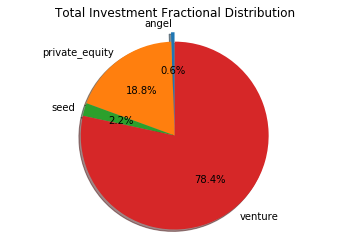

In [253]:
# Using pie plot, demostrate fraction of total investments (globally) in angel, venture, seed, and private equity
import matplotlib.pyplot as plt
%matplotlib inline
explode = (0.1, 0, 0, 0)
fig1, ax_sum = plt.subplots()
ax_sum.pie(final_plot_1_df['sum (in billions)'], explode=explode, labels=final_plot_1_df['funding_round_type'],
           autopct='%1.1f%%', shadow=True, startangle=90)
ax_sum.axis('equal')
plt.title("Total Investment Fractional Distribution")
plt.show()

This pie chart clearly shows that "venture" funding type has recieved the highest total investment globally, followed by private equity

[Text(0.5, 0, 'Funding Round Type')]

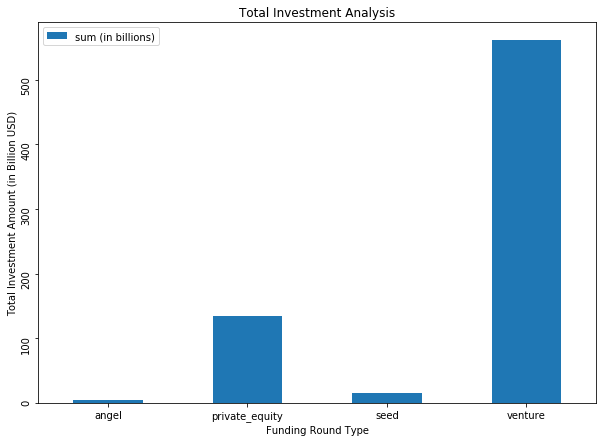

In [254]:
# Using bar plot, demostrate fraction of total investments (globally) in angel, venture, seed, and private equity
ax=final_plot_1_df.plot(x='funding_round_type', y='sum (in billions)', kind="bar",
                        title= "Total Investment Analysis", figsize=(10,7))
ax.legend(loc='best')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
for tick in ax.get_yticklabels():
    tick.set_rotation(90)
ax.set(ylabel='Total Investment Amount (in Billion USD)')
ax.set(xlabel='Funding Round Type')

This bar chart clearly demonstrates that "venture" funding type has recieved the highest total investment globally, followed by private equity, in terms of billion dollars USD

[Text(0.5, 0, 'Funding Round Type')]

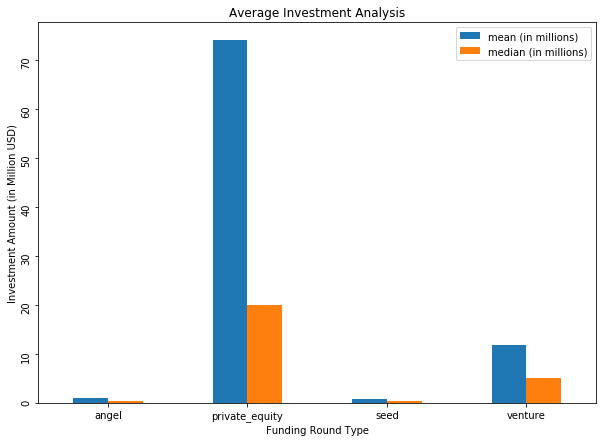

In [255]:
# Using bar plot, demostrate average amount of investment in each funding type.
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.
ax=final_plot_1_df.plot(x='funding_round_type', y=['mean (in millions)', 'median (in millions)'], kind="bar",
                        title= "Average Investment Analysis", figsize=(10,7))
ax.legend(loc='best')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
for tick in ax.get_yticklabels():
    tick.set_rotation(90)
ax.set(ylabel='Investment Amount (in Million USD)')
ax.set(xlabel='Funding Round Type')

This plot clearly demostrates the following for both mean and median of investment amount (in Million Dollars USD):
- Highest average investment per round is in private_equity funding type
- But based on the requirements of Sparks Fund, that they would like to invest 5-15 Million USD, so Venture funding type fits best because it's both mean & median lies in the range.
- Mean of all investments in Venture is ~11 Million Dollars USD.
- Median of all investments in Venture funding is ~5 Million Dollars USD.
- We pulled out median also just because we observed few outliers in Venture funding type.
- Earlier we have also observed that Venture funding type had the highest total investment globally.

[Text(0.5, 0, 'Funding Round Type')]

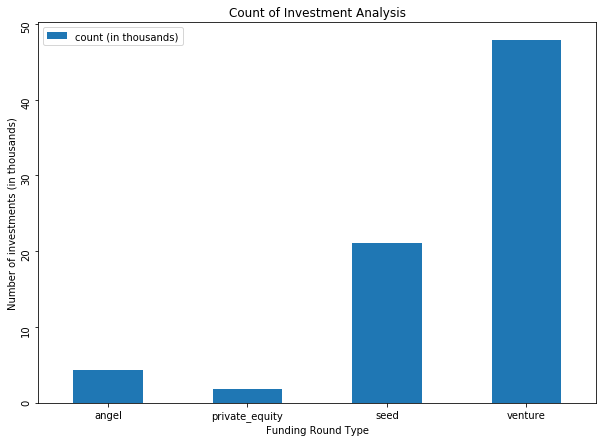

In [256]:
# Using bar plot, demostrate distribution of number of investments in each funding type.
# This chart should make it clear about the trend where people are investing more.
ax=final_plot_1_df.plot(x='funding_round_type', y='count (in thousands)', kind="bar",
                        title= "Count of Investment Analysis", figsize=(10,7))
ax.legend(loc='best')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
for tick in ax.get_yticklabels():
    tick.set_rotation(90)
ax.set(ylabel='Number of investments (in thousands)')
ax.set(xlabel='Funding Round Type')

This plot clearly demostrates that Venture Funding type is the one where most the of investors are investing their capital on.

This also proves that private equity type investments are associated with much larger companies and involve much higher investments than venture type. Means such less count of investments actually produce so much investment which is at par with venture

In [257]:
# Merge sum_df_backup, mean_df_backup, median_df_backup and count_df_backup
# These backup dataframes are without the value conversion into Billions / Millions / Thousands
import functools
dfs = [sum_df_backup, mean_df_backup, median_df_backup, count_df_backup]
final_plot_1_df = functools.reduce(lambda left,right: pd.merge(left,right,on='funding_round_type'), dfs)

In [258]:
final_plot_1_df

,sum,mean,median,count
funding_round_type,,,,
angel,4274925121.00,971573.89,414906.00,4400
private_equity,134568045021.00,73938486.28,20000000.00,1820
seed,15774707732.00,747793.68,300000.00,21095
venture,560523362596.00,11724222.69,5000000.00,47809


In [259]:
# Using the most deterministic and representable value as log of mean, median, count and sum
# This is an attempt to normalize the dataframe so that bars in plot are clearly visible
import math
final_plot_1_df['log_of_sum'] = final_plot_1_df['sum'].apply(lambda x: math.log(x))
final_plot_1_df['log_of_mean'] = final_plot_1_df['mean'].apply(lambda x: math.log(x))
final_plot_1_df['log_of_median'] = final_plot_1_df['median'].apply(lambda x: math.log(x))
final_plot_1_df['log_of_count'] = final_plot_1_df['count'].apply(lambda x: math.log(x))

In [260]:
final_plot_1_df = final_plot_1_df.reset_index()

In [261]:
final_plot_1_df

,funding_round_type,sum,mean,median,count,log_of_sum,log_of_mean,log_of_median,log_of_count
0,angel,4274925121.00,971573.89,414906.00,4400,22.18,13.79,12.94,8.39
1,private_equity,134568045021.00,73938486.28,20000000.00,1820,25.63,18.12,16.81,7.51
2,seed,15774707732.00,747793.68,300000.00,21095,23.48,13.52,12.61,9.96
3,venture,560523362596.00,11724222.69,5000000.00,47809,27.05,16.28,15.42,10.77


[Text(0.5, 0, 'Funding Round Type')]

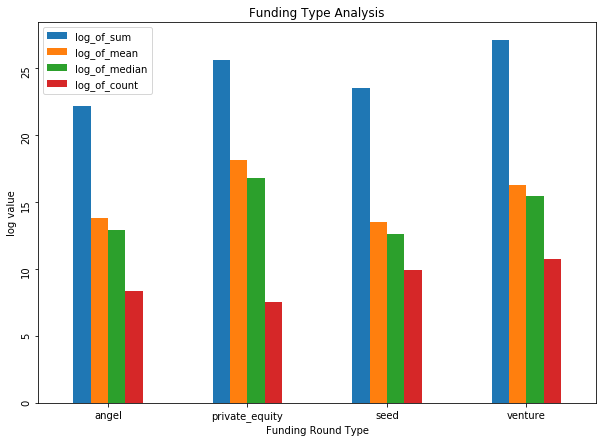

In [262]:
# Plot using matplotlib
ax=final_plot_1_df.plot(x='funding_round_type', y=['log_of_sum','log_of_mean','log_of_median','log_of_count'],
                        kind="bar", title= "Funding Type Analysis", figsize=(10,7))
ax.legend(loc='best')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
for tick in ax.get_yticklabels():
    tick.set_rotation(90)
ax.set(ylabel='log value')
ax.set(xlabel='Funding Round Type')

This plot shows following observations:
1. Highest sum of investment is in venture funding, followed by private_equity
2. Mean & Median investment is slightly higher in private_equity v/s venture funding, but considering 5 to 15 million bracket of investment, Venture funding is in that range and highly competitive with private equity.
3. Count of number of investments is more in venture funding compared to private_equity.
4. Angel and seed funding are out of scope for the analysis due to lesser total investments compared to venture funding and private equity.
5. Private equity type investments are associated with much larger companies and involve much higher investments than venture type. So less count of invesetments but more cumulative size of investment amounts which is at par with venture funding type

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, "Venture" investment funding is the most suitable because of following reasons:
1. Mean investment is within range of 5 to 15 million USD
2. Median investment is within range of 5 to 15 million USD
3. Most of the investment is happening in only Venture Funding i.e sum of total investment.
3. Maximum investors are investing in venture funding i.e count of investment

Thus for Spark Funds, "Venture" investment funding is the most suitable.

# Plot # 2

## A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [263]:
# For the chosen investment type "venture", we made a data frame named top9 with the top nine countries
# (based on the total investment amount each country has received)
top9.head()

,raised_amount_usd
country_code,
usa,420068029342.00
chn,39338918773.00
gbr,20072813004.00
ind,14261508718.00
can,9482217668.00


In [264]:
# Reusing top9 dataframe. For the venture investment type, top9 is a datafre with the top nine countries
# (based on the total investment amount each country has received)
final_plot_2_df = top9.reset_index()

In [265]:
final_plot_2_df

,country_code,raised_amount_usd
0,usa,420068029342.00
1,chn,39338918773.00
2,gbr,20072813004.00
3,ind,14261508718.00
4,can,9482217668.00
5,fra,7226851352.00
6,isr,6854350477.00
7,deu,6306921981.00
8,jpn,3167647127.00


In [266]:
# Uppercasing country codes for better visbility purpose
final_plot_2_df['country_code'] = final_plot_2_df['country_code'].apply(lambda x: x.upper())

In [267]:
# Dividing total investment amount with 1,000,000 so as to report in Billion USD
final_plot_2_df['total investment (in billions)'] = final_plot_2_df['raised_amount_usd']. \
                                                    apply(lambda x: x/billion_converter)

In [268]:
final_plot_2_df

,country_code,raised_amount_usd,total investment (in billions)
0,USA,420068029342.00,420.07
1,CHN,39338918773.00,39.34
2,GBR,20072813004.00,20.07
3,IND,14261508718.00,14.26
4,CAN,9482217668.00,9.48
5,FRA,7226851352.00,7.23
6,ISR,6854350477.00,6.85
7,DEU,6306921981.00,6.31
8,JPN,3167647127.00,3.17


In [269]:
# English speaking countries
final_plot_2_df[(final_plot_2_df['country_code'] == 'USA') |
               (final_plot_2_df['country_code'] == 'GBR') |
               (final_plot_2_df['country_code'] == 'IND') |
               (final_plot_2_df['country_code'] == 'CAN')]

,country_code,raised_amount_usd,total investment (in billions)
0,USA,420068029342.00,420.07
2,GBR,20072813004.00,20.07
3,IND,14261508718.00,14.26
4,CAN,9482217668.00,9.48


In [270]:
# Add a new column english_speaking_flag
final_plot_2_df['english_speaking_flag'] = final_plot_2_df['country_code']. \
                                            apply(lambda x: 1 if x in ['USA', 'GBR', 'IND', 'CAN', 'ISR'] else 0)

In [271]:
final_plot_2_df

,country_code,raised_amount_usd,total investment (in billions),english_speaking_flag
0,USA,420068029342.00,420.07,1
1,CHN,39338918773.00,39.34,0
2,GBR,20072813004.00,20.07,1
3,IND,14261508718.00,14.26,1
4,CAN,9482217668.00,9.48,1
5,FRA,7226851352.00,7.23,0
6,ISR,6854350477.00,6.85,1
7,DEU,6306921981.00,6.31,0
8,JPN,3167647127.00,3.17,0


[Text(0.5, 0, 'Country Code')]

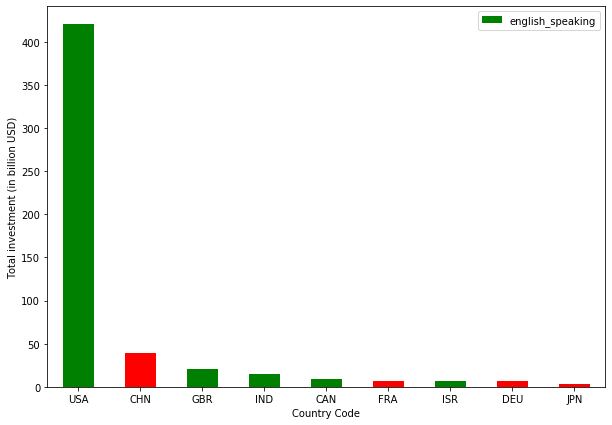

In [272]:
# Plot to demonstrate the top 9 countries against the total amount of investments.
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
# ONLY for Venture funding investment type
ax_2 = final_plot_2_df.plot(x='country_code', y='total investment (in billions)', kind="bar", figsize=(10,7),
                           color=final_plot_2_df.english_speaking_flag.map({1: 'g', 0: 'r'}))
ax_2.legend(['english_speaking'], loc='best')
for tick in ax_2.get_xticklabels():
    tick.set_rotation(0)
ax_2.set(ylabel='Total investment (in billion USD)')
ax_2.set(xlabel='Country Code')

This plot clearly shows the top 9 countries against the total amount of investments of funding type FT.

This also makes top 3 countries (Country 1, Country 2, and Country 3) very clear as english speaking country.

Country_1, Country_2, Country_3 are USA (The United States of America), GBR (Great Britain) and IND (India) respectively

Assumption: This plot would be a mix of english & non english speaking countries, because top9 dataframe contains both as well

# Plot # 3

## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [273]:
# Resuing D1 dataframe creating during country analysis
final_plot_3_df = D1.sort_values(by='count',ascending=False)[['main_sector', 'count']].drop_duplicates()[:3]

In [274]:
# Add a static column with constant country_code_1
final_plot_3_df['country'] = 'USA'

In [275]:
final_plot_3_df

,main_sector,count,country
47772,others,1200,USA
4389,cleantech / semiconductors,1099,USA
29827,"social, finance, analytics, advertising",972,USA


In [276]:
# Append D2 i.e second top country dataframe to final_plot_3_df
final_plot_3_df = final_plot_3_df.append(D2.sort_values(by='count',ascending=False)[['main_sector', 'count']]. \
                                        drop_duplicates()[:3], sort=False)

In [277]:
final_plot_3_df

,main_sector,count,country
47772,others,1200,USA
4389,cleantech / semiconductors,1099,USA
29827,"social, finance, analytics, advertising",972,USA
19928,others,96,NaN
28344,cleantech / semiconductors,67,NaN
39384,"social, finance, analytics, advertising",55,NaN


In [278]:
# Newly added rows have country code as NaN, fillna with the appropriate country_code
final_plot_3_df = final_plot_3_df.fillna('GBR')

In [279]:
final_plot_3_df

,main_sector,count,country
47772,others,1200,USA
4389,cleantech / semiconductors,1099,USA
29827,"social, finance, analytics, advertising",972,USA
19928,others,96,GBR
28344,cleantech / semiconductors,67,GBR
39384,"social, finance, analytics, advertising",55,GBR


In [280]:
# Append D3 i.e third top country dataframe to final_plot_3_df
final_plot_3_df = final_plot_3_df.append(D3.sort_values(by='count',ascending=False)[['main_sector', 'count']]. \
                                        drop_duplicates()[:3], sort=False)

In [281]:
final_plot_3_df

,main_sector,count,country
47772,others,1200,USA
4389,cleantech / semiconductors,1099,USA
29827,"social, finance, analytics, advertising",972,USA
19928,others,96,GBR
28344,cleantech / semiconductors,67,GBR
39384,"social, finance, analytics, advertising",55,GBR
29985,others,31,NaN
47450,"social, finance, analytics, advertising",17,NaN
22014,"news, search and messaging",9,NaN


In [282]:
# Newly added rows have country code as NaN, fillna with the appropriate country_code
final_plot_3_df = final_plot_3_df.fillna('IND')

In [283]:
final_plot_3_df

,main_sector,count,country
47772,others,1200,USA
4389,cleantech / semiconductors,1099,USA
29827,"social, finance, analytics, advertising",972,USA
19928,others,96,GBR
28344,cleantech / semiconductors,67,GBR
39384,"social, finance, analytics, advertising",55,GBR
29985,others,31,IND
47450,"social, finance, analytics, advertising",17,IND
22014,"news, search and messaging",9,IND


In [284]:
# Using the most deterministic and representable value as log of count column
# This is an attempt to normalize the dataframe so that bars in plot are clearly visible
final_plot_3_df['count'] = final_plot_3_df['count'].apply(lambda x: math.log(x))

In [285]:
# Using pivot to create a new dataframe with the data oriented so the default Pandas stacked plot works perfectly.
pivot_df = final_plot_3_df.pivot(index='country', columns='main_sector', values='count')

In [286]:
pivot_df

main_sector,cleantech / semiconductors,"news, search and messaging",others,"social, finance, analytics, advertising"
country,,,,
GBR,4.20,nan,4.56,4.01
IND,nan,2.20,3.43,2.83
USA,7.00,nan,7.09,6.88


[Text(0, 0.5, 'Total number of investment (log value)')]

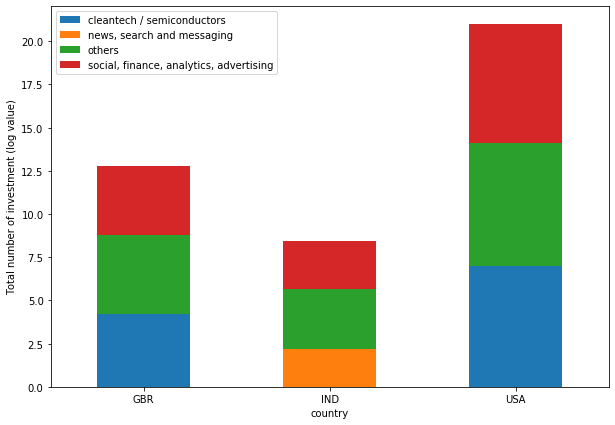

In [287]:
# Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
# ONLY for Venture funding investment type
ax_3 = pivot_df.loc[:,:].plot.bar(stacked=True, figsize=(10,7))
ax_3.legend(loc='best')
for tick in ax_3.get_xticklabels():
    tick.set_rotation(0)
ax_3.set(ylabel='Total number of investment (log value)')

This plot clearly shows the following:
1. USA has received the most number (count) of investments
    - Others main sector is the top sector in investment.
    - cleantech / semiconductors, is the second top sector
    - social, finance, analytics, advertising: is the third top sector
2. GBR has received the second most number (count) of investments
    - Others main sector is the top sector in investment.
    - cleantech / semiconductors, is the second top sector
    - social, finance, analytics, advertising: is the third top sector
3. IND has received the third most number (count) of investments
    - Others main sector is the top sector in investment.
    - social, finance, analytics, advertising: is the second top sector
    - news, search and messaging, is the third top sector

Assumption: Number of investments is only the count and not sum/average of investments.